In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [137]:
read_data = pd.read_csv('file.csv', index_col = False)
class_A = pd.read_csv('class_A.csv')
class_B = pd.read_csv('class_B.csv')
class_C = pd.read_csv('class_C.csv')

In [138]:
arr = np.array(read_data)
arr.shape

(1, 768)

In [141]:
new_data = arr.reshape(-1,1)

new_data = pd.DataFrame(new_data)
new_data.head()

0
0  11.7
1  11.9
2  14.0
3  13.6
4  13.9

In [142]:
read_data = new_data

In [143]:
read_data.keys()

RangeIndex(start=0, stop=1, step=1)

In [145]:
#frame = np.array([10.1,7.9])
#d1 = read_data['10.1']
#d2 = read_data['7.9']

In [146]:
#array =np.append(frame, d1)
#array2 = np.append(array,d2)

In [147]:
#array2.shape

In [148]:
#d1.shape, d2.shape

In [149]:
#frame = pd.DataFrame(array2, columns = [ 'x'])

In [150]:
#frame.head()

In [151]:
frame = read_data

In [152]:
def expansion(x):
    return pow(x,2)

expansion(3)

9

In [155]:
frame['x_squared'] = frame.apply(expansion)

In [156]:
frame.head()

0  x_squared
0  11.7     136.89
1  11.9     141.61
2  14.0     196.00
3  13.6     184.96
4  13.9     193.21

In [157]:
def sqaure_root(x):
    return np.sqrt(x)

def cube_root(x):
    return pow(x,3)

cube_root(3)
#frame['x_square_root'] = frame['x'].apply(sqaure_root)

27

In [158]:
frame_trial = frame
frame_trial['x_cube_root'] = frame[0].apply(cube_root)

In [159]:
frame.head()

0  x_squared  x_cube_root
0  11.7     136.89     1601.613
1  11.9     141.61     1685.159
2  14.0     196.00     2744.000
3  13.6     184.96     2515.456
4  13.9     193.21     2685.619

In [225]:
val = '12.8.3.5'
def concat_two(list_val):
    list_val = list_val.split('.')
    return float(list_val[0]+'.'+list_val[1]) 
concat_two(val)

12.8

In [227]:
def min_max(data):
    list_data = []
    data= list(data)
    for i in data:
        try:
            data_list = i.split('.')
            list_data.append(float(concat_two(i)))
        except IndexError:
            list_data.append(i)
    return list_data

cla_a = min_max(class_A)
min(cla_a), max(cla_a)

TypeError: '<' not supported between instances of 'str' and 'float'

In [160]:
min(class_A), max(class_A)

('10', '5.2')

In [161]:
min(class_B), max(class_B)

('6.1', '9.9.1')

In [162]:
min(class_C), max(class_C)

('14.3', '18.9')

In [163]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
0              768 non-null float64
x_squared      768 non-null float64
x_cube_root    768 non-null float64
dtypes: float64(3)
memory usage: 18.1 KB


In [228]:
def create_target(data):
    target = []
    for i in data:
        if i >= 10 and i <= 14:
            target.append(0)
        elif i >= 6 and i <= 9.9:
            target.append(1)
        else:
            target.append(2)
    return target


target = np.array(create_target(frame[0]))

In [229]:
target.shape

(768,)

In [230]:
frame['target'] = target
frame_trial['target'] = target

In [231]:
frame.shape

(768, 4)

In [232]:
frame.head()

0  x_squared  x_cube_root  target
0  11.7     136.89     1601.613       0
1  11.9     141.61     1685.159       0
2  14.0     196.00     2744.000       0
3  13.6     184.96     2515.456       0
4  13.9     193.21     2685.619       0

In [233]:
np.unique(frame['target'])

array([0, 1, 2])

In [234]:
frame['target'].value_counts()

2    259
1    256
0    253
Name: target, dtype: int64

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
import sklearn as sk


In [237]:
from sklearn.svm import SVC

In [238]:
target = frame['target']
data = frame.drop('target', axis = 1)

frame_trial_data = frame.drop('target', axis = 1)

In [239]:
std_scale = StandardScaler()
data_scale = std_scale.fit_transform(data)
frame_trial_scale = std_scale.fit_transform(frame_trial_data)

In [240]:
data_scale

array([[-0.05634796, -0.21457405, -0.34609395],
       [-0.00401999, -0.16314764, -0.29885642],
       [ 0.54542377,  0.42945454,  0.29982016],
       ..., 
       [ 1.46116336,  1.63067518,  1.77857264],
       [ 1.48732735,  1.66891812,  1.83081685],
       [ 1.51349134,  1.70737898,  1.88365813]])

In [241]:
from sklearn.cross_validation import train_test_split

In [242]:
x_train, x_test, y_train, y_test = train_test_split(data_scale, target, train_size = .8, random_state = 42)


trial_x_train, trial_x_test, trial_y_train, trial_y_test = train_test_split(frame_trial_scale, target, train_size = .8, random_state = 42)

In [243]:
x_train.shape, y_train.shape

((614, 3), (614,))

In [244]:
svc = SVC()

svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [245]:
svc_trial = SVC(kernel = 'linear')

svc_trial.fit(trial_x_train, trial_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [246]:
svc.score(x_train, y_train)

0.97882736156351791

In [247]:
w = svc_trial.coef_[0]
print(w)

[ 2.56626334  2.06640868  1.55719185]


In [248]:
svc_trial.intercept_[0]

4.3494874629663229

In [249]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(frame.iloc[:,:1])

poly.fit(X_poly, y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [250]:
frame['target'].shape

(768,)

In [251]:
frame.iloc[:,:1].shape

(768, 1)

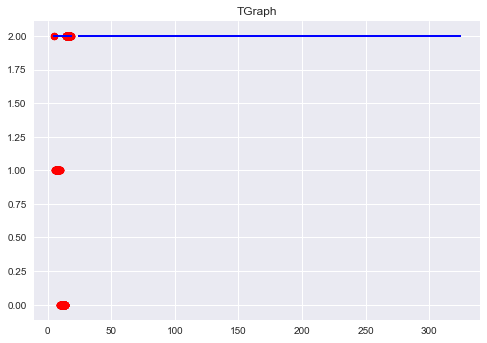

In [252]:
plt.scatter(frame.iloc[:,:1], frame['target'], color = 'red')
plt.plot(frame.iloc[:,:2], svc.predict(X_poly), color = 'blue')
plt.title('TGraph')
plt.show()

In [253]:
svc_trial.score(x_train, y_train)

0.97882736156351791

In [254]:
prediction = svc.predict(x_test)

In [255]:
trial_prediction  = svc_trial.predict(trial_x_test)

In [256]:
from sklearn.metrics import accuracy_score, precision_score

accuracy = accuracy_score(prediction, y_test)
accuracy

0.98701298701298701

In [257]:
accuracy = accuracy_score(trial_prediction, y_test)
accuracy

0.98701298701298701

In [258]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(x_train,y_train)

GaussianNB(priors=None)

In [259]:
clf.score(x_train, y_train)

0.97882736156351791

In [266]:
prediction_gnb = clf.predict(x_test)

In [267]:
accuracy = accuracy_score(prediction_gnb, y_test)
accuracy

0.98701298701298701

In [260]:
from sklearn.mixture import GMM
import warnings
warnings.filterwarnings('ignore')

gmm = GMM(n_components=2)
gmm.fit(x_train)  # values is numpy vector of floats

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)

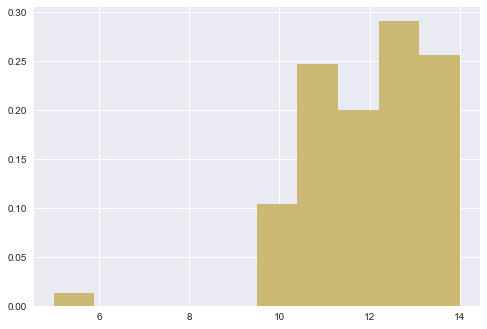

In [261]:
def distribution(data):
    fit = stats.norm.pdf(data, np.mean(data), np.std(data))  #this is a fitting indeed

    pl.plot(data,fit,'-o')

    pl.hist(data,normed=True)      #use this to draw histogram of your data

    pl.show() 
    return

distribution(class_A)

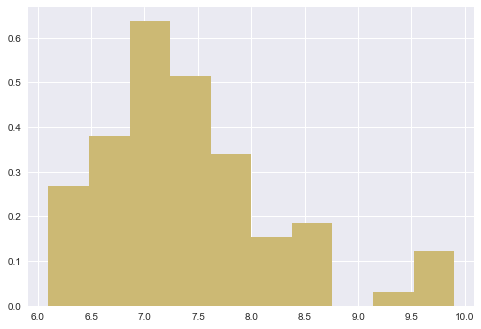

In [262]:
distribution(class_B)

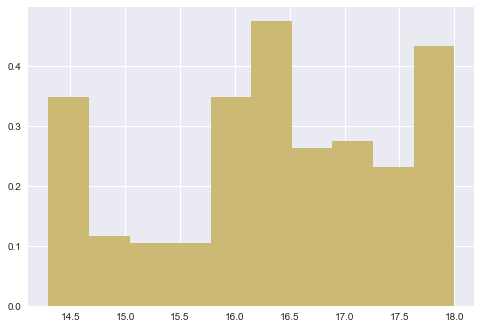

In [263]:
distribution(class_C)

In [264]:
from scipy import stats

def plot_data(data):
    d = data
    tvals = stats.t.pdf(d,5)
    plt.plot(d, tvals)
    plt.show()
    return

#plot_data(class_A)

In [265]:
def plot_dist(data):
    d = list(np.array(data))
    d.sort()
    dmean = np.mean(d)
    dstd = np.std(d)
    pdf = stats.norm.pdf(d, dmean, dstd)
    plt.plot(d, pdf)
    plt.show()
    return

#plot_dist(class_B)